# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

  Could not find a version that satisfies the requirement tensorflow==1.7.1 (from unityagents==0.4.0) (from versions: 1.13.0rc1, 1.13.0rc2, 1.13.1, 2.0.0a0)
No matching distribution found for tensorflow==1.7.1 (from unityagents==0.4.0)


In [2]:

#from tensorboardX import SummaryWriter

# %load_ext version_information
# %version_information numpy, unityagents, torch, matplotlib, pandas, statsmodel

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [3]:
from unityagents import UnityEnvironment
import numpy as np
path = r"C:\Users\adith\Desktop\Meng Robotics\reinforcement\Banana\MADDPG\Multiagent\Tennis_Windows_x86_64\Tennis"
env = UnityEnvironment(file_name=path , seed =1)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states)

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -6.63803244 -1.5
  -0.          0.          6.00063038  6.         -0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -7.07908773 -1.5
   0.          0.         -6.00063038  6.          0.          0.        ]]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards
        print("states", actions)
        # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

states [[-0.07850662  0.66467728]
 [ 0.00867366 -0.61050433]]
states [[-1.         -0.07318067]
 [ 1.          0.60926053]]
states [[0.08756348 0.38029686]
 [0.08472913 0.49769371]]
states [[ 0.39222115 -0.97472818]
 [-1.          0.35250819]]
states [[-0.54256115  1.        ]
 [-1.         -0.91938122]]
states [[ 0.7527567  1.       ]
 [-1.         1.       ]]
states [[1.         0.72845943]
 [1.         1.        ]]
states [[-1.          0.85636271]
 [-0.04419607 -0.61351195]]
states [[ 0.4250895  -0.30951264]
 [-1.          0.59409601]]
states [[ 0.66636247 -0.67815379]
 [-0.75105503 -0.65937504]]
states [[ 1.          0.48280744]
 [ 1.         -0.42792463]]
states [[ 1.          0.53022466]
 [ 0.21207705 -0.46004665]]
states [[-0.76844115  0.35734642]
 [-1.         -0.99145333]]
states [[ 1.         -0.01264342]
 [-0.7205949  -1.        ]]
states [[0.14837574 1.        ]
 [1.         0.75606108]]
Total score (averaged over agents) this episode: -0.004999999888241291
states [[ 0.436

In [7]:
import torch
def transpose_list(mylist):
    return list(map(list, zip(*mylist)))

def transpose_to_tensorAsitis(input_list):
    make_tensor = lambda x: torch.tensor(x, dtype=torch.float)
    return list(map(make_tensor, input_list))

env_info = env.step(actions)[brain_name]           # send all actions to tne environment
next_states = env_info.vector_observations
print(next_states)
s = transpose_list(next_states)
print(s)
p = np.concatenate((next_states[0], next_states[1]))
print(np.shape(p)[0])
s = transpose_to_tensorAsitis(next_states)
print("tensor", s)

[[  0.           0.           0.           0.           0.
    0.           0.           0.          -7.69742537  -1.5
   -0.           0.          -7.5934515    5.98822832  -0.
    0.          -5.92123795  -1.55886006  17.76186752  -0.98100001
   -7.5934515    5.89012814  17.76186752  -0.98100001]
 [  0.           0.           0.           0.           0.
    0.           0.           0.          -6.45862055  -1.5
    0.           0.           7.5934515    5.98822832   0.
    0.          -9.45862198  -1.55886006 -30.          -0.98100001
    7.5934515    5.89012814 -30.          -0.98100001]]
[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [-7.697425365447998, -6.458620548248291], [-1.5, -1.5], [-0.0, 0.0], [0.0, 0.0], [-7.593451499938965, 7.593451499938965], [5.9882283210754395, 5.9882283210754395], [-0.0, 0.0], [0.0, 0.0], [-5.921237945556641, -9.458621978759766], [-1.5588600635528564, -1.5588600635528564], [17.76186752319336, -30.0],

In [8]:
# main code that contains the neural network setup
# policy + critic updates
# see ddpg.py for other details in the network

from ddpg import DDPGAgent
import torch
from utilities import soft_update, transpose_to_tensor, transpose_list , transpose_to_tensorAsitis , giveCurrentAgentsAction
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = 'cpu'
print("the device that gonna be used is ", device)
import numpy as np
np.random.seed(0)
import torch.nn.functional as F



class MADDPG:
    def __init__(self, state_size , action_size , discount_factor=0.95, tau=0.05 , lr_actor = 2e-4 , lr_critic = 2e-3 , num_agents =2):
        super(MADDPG, self).__init__()
        
        hidden_in_dim = 256
        hidden_out_dim = 128
        out_ext = 64
        # critic input = obs_full + actions = 48+2+2=52
        # have to change the agent neurons for sure
        
        # the no of agents is two because there are only two players
        self.maddpg_agent = [DDPGAgent(state_size , action_size,hidden_in_dim, hidden_out_dim, extrem_out = out_ext, num_agents =num_agents , lr_actor = lr_actor, lr_critic = lr_critic), 
                             DDPGAgent(state_size , action_size, hidden_in_dim, hidden_out_dim, extrem_out = out_ext,num_agents =num_agents, lr_actor = lr_actor, lr_critic = lr_critic)]
        
        self.num_agents = num_agents 
        self.action_vector = 2
        
        self.discount_factor = discount_factor
        self.tau = tau
        self.iter = 0

    def get_actors(self):
        """get target_actors of all """
        """get actors of all the agents in the MADDPG object"""
        actors = [ddpg_agent.actor for ddpg_agent in self.maddpg_agent]
        return actors

    def get_target_actors(self):
        """the agents in the MADDPG object"""
        target_actors = [ddpg_agent.target_actor for ddpg_agent in self.maddpg_agent]
        return target_actors

    def act(self, obs_all_agents, noise=0.0 , batch = True):
        """get actions from all agents in the MADDPG object"""
        #print(obs_all_agents)
        #shape_vec = [np.shape(obs) for obs in obs_all_agents]
        #print("shape",shape_vec)
        actions = [agent.act(obs, noise , batch = batch) for agent, obs in zip(self.maddpg_agent, obs_all_agents)]
        #print(actions)
        return actions

    def target_act(self,agent_no, obs_all_agents, noise=0.0 , batch = True):
        """get target network actions from all the agents in the MADDPG object """
        target = []
        for i, obs in enumerate(obs_all_agents):
                target_actions = [self.maddpg_agent[i].target_act(obs[i,:], batch = batch) for i in range(agent_no)]
                target_actions = torch.stack(target_actions)
                target.append(target_actions)
        return target
    
    def target_act_batch(self,agent_no, obs_all_agents, noise=0.0 , batch = True):
        """get target network actions from all the agents in the MADDPG object """
        target_actions = [self.maddpg_agent[i].target_act(obs_all_agents[:,i,:] , batch = batch) for i in range(agent_no)]
        target_actions = torch.stack(target_actions)
        return target_actions
    
    def act_with_agent(self,agent_no, agent_id ,obs_all_agents, noise=0.0 , batch = True):
        """get target network actions from all the agents in the MADDPG object """
        
        actions = [self.maddpg_agent[i].actor(obs_all_agents[:,i,:] ,batch = batch) if i == agent_id \
           else self.maddpg_agent[i].actor(obs_all_agents[:,i,:] , batch = batch).detach() for i in range(agent_no)]
        
        actions = torch.stack(actions)

        return actions

    def update(self, samples, agent_number , update_actor = True):
        """update the critics and actors of all the agents """

        # need to transpose each element of the samples
        # to flip obs[parallel_agent][agent_number] to
        # obs[agent_number][parallel_agent]
        
        
        
        obs, obs_full, action, reward, next_obs, next_obs_full, done = samples
        samples = (np.array(obs), obs_full, action, reward, np.array(next_obs), next_obs_full, done)
        
        batch_size = np.shape(obs_full)[0]
        Batch_use = True if batch_size >1 else False
        
        action_size = self.num_agents * self.action_vector
        
        obs, obs_full, action, reward, next_obs, next_obs_full, done = map(transpose_to_tensorAsitis, samples)
        
        
        obs_full = torch.stack(obs_full).to(device)
        next_obs_full = torch.stack(next_obs_full).to(device)
        
        agent = self.maddpg_agent[agent_number]
        agent.critic_optimizer.zero_grad()

        # critic loss = batch mean of (y- Q(s,a) from target network)^2
        #y = reward of this timestep + discount * Q(st+1,at+1) from target network
        # !crictal logic error have to change her to the agents observation only
        
        
        next_obs = torch.stack(next_obs).to(device)
        obs = torch.stack(obs).to(device)
        
        action = torch.stack(action).to(device)
        #print(action[:,agent_number,:] , action)
        #target_actions = self.target_act_batch(2,next_obs)
        
        actions_next = agent.target_act(next_obs[:,agent_number,:], batch = Batch_use).to(device)
        
        #print(actions_next.size())
        
        if agent_number == 0:
            target_actions = torch.cat((actions_next, action[:,num_agents -1 - agent_number,:]), dim=1)
        else:
            target_actions = torch.cat((action[:,num_agents - agent_number -1,:], actions_next), dim=1)
        
        target_actions = target_actions.to(device)
        #batch size and action size
        #target_critic_input = torch.cat((next_obs_full.view(-1,batch_size).t(),target_actions.view(-1,action_size)), dim=1).to(device)
        
        #Current_Agent_actions_target,other_agent_Action_target = giveCurrentAgentsAction(target_actions , agent_number , Tuples = False, batch = Batch_use)
            
        with torch.no_grad():
                #critic_state = torch.cat((next_obs_full.view(-1,batch_size).t(),target_actions) , dim=1)
                q_next=agent.target_critic.critic_forward(next_obs_full.view(-1,batch_size).t() , target_actions.view(-1,action_size)).to(device)
        
        #indices = torch.tensor([1])
                                                        
                                                        
                                                        
                                                        
        reward = torch.stack(reward).to(device)
                                                                                              
        done = torch.stack(done).to(device)
        
        y = reward[:,agent_number].view(-1, 1) + self.discount_factor * q_next * (1 - done[:,agent_number].view(-1, 1)).to(device)
        
        
        
        #Current_Agent_actions,other_agent_Action = giveCurrentAgentsAction(action , agent_number , batch = Batch_use)
        #print(action,Current_Agent_actions.size(),other_agent_Action.size())
        #critic_input = torch.cat((obs_full.view(-1,batch_size).t(), other_agent_Action), dim=1).to(device)
        
        q = agent.critic.critic_forward(obs_full.view(-1,batch_size).t(),  action.view(-1,action_size)).to(device)

        huber_loss = torch.nn.SmoothL1Loss()
        mse_loss = F.mse_loss
        critic_loss = huber_loss(q, y.detach())
        #print(critic_loss)
        critic_loss.backward()
        
        #torch.nn.utils.clip_grad_norm_(agent.critic.parameters(), 0.3)
        agent.critic_optimizer.step()

        #update actor network using policy gradient
        if(update_actor):
            agent.actor_optimizer.zero_grad()

            # make input to agent
            # detach the other agents to save computation
            # saves some time for computing derivative


    #         q_input = [ self.maddpg_agent[i].actor(ob) if i == agent_number \
    #                    else self.maddpg_agent[i].actor(ob).detach()
    #                    for i, ob in enumerate(obs) ]

            q_input = agent.actor(obs[:,agent_number,:] ,batch = Batch_use)
        
        
            if agent_number == 0:
                q_input = torch.cat((q_input, action[:,num_agents - agent_number -1,:]), dim=1)
            else:
                q_input = torch.cat((action[:,num_agents - agent_number -1,:], q_input), dim=1)

            q_input = q_input.to(device)
            
            #Current_Agent_Qin,other_agent_Qin = giveCurrentAgentsAction(q_input , agent_number , batch = Batch_use , Tuples = False)

            # combine all the actions and observations for input to critic
            # many of the obs are redundant, and obs[1] contains all useful information already

            #q_input2 = torch.cat((obs_full.view(-1,batch_size).t(), other_agent_Qin), dim=1).to(device)

            # get the policy gradient
            actor_loss = -agent.critic.critic_forward(obs_full.view(-1,batch_size).t(), q_input.view(-1,action_size)).mean()
            
            actor_loss.backward()
            #torch.nn.utils.clip_grad_norm_(agent.actor.parameters(),0.3)
            agent.actor_optimizer.step()

    def update_targets(self):
        """soft update targets"""
        self.iter += 1
        for ddpg_agent in self.maddpg_agent:
            soft_update(ddpg_agent.target_actor, ddpg_agent.actor, self.tau)
            soft_update(ddpg_agent.target_critic, ddpg_agent.critic, self.tau)

cuda
the device that gonna be used is  cuda


Number of agents: 2
Size of each action: 2


critic Network(
  (bnS): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=48, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=260, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
  (fc4): Linear(in_features=64, out_features=1, bias=True)
) Network(
  (bnS): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=48, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=260, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
  (fc4): L

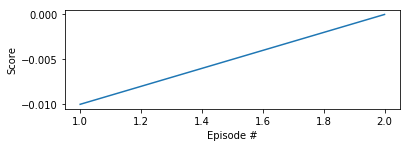

agent0/mean_episode_rewards -0.009999999776482582 0
agent1/mean_episode_rewards 0.0 0


TypeError: 'bool' object is not callable

In [9]:
# main function that sets up environments
# perform training loop

#import envs
import matplotlib.pyplot as plt
%matplotlib inline
from buffer import ReplayBuffer
#from maddpg import MADDPGuy7
import torch
import numpy as np
np.random.seed(0)
#from tensorboardX import SummaryWriter
import os
from utilities import transpose_list, transpose_to_tensor

# keep training awake
from workspace_utils import keep_awake

# for saving gif
import imageio

def seeding(seed=0):
    np.random.seed(seed)
    torch.manual_seed(seed)

def pre_process(entity, batchsize):
    processed_entity = []
    for j in range(3):
        list = []
        for i in range(batchsize):
            b = entity[i][j]
            list.append(b)
        c = torch.Tensor(list)
        processed_entity.append(c)
    return processed_entity

buffer = ReplayBuffer(int(1e4))
def main():
    env_info = env.reset(train_mode=True)[brain_name]
    num_agents = len(env_info.agents)
    print('Number of agents:', num_agents)

    # size of each action
    action_size = brain.vector_action_space_size
    print('Size of each action:', action_size)

    # examine the state space 
    states = env_info.vector_observations
    state_size = states.shape[1]
    
    seeding()
    # number of parallel agents
    #parallel_envs = num_agents
    # number of training episodes.
    # change this to higher number to experiment. say 30000.
    
    number_of_episodes = 4000
    update_actor_after = 1
    update_actor_every = 1
    episode_length = 100
    batchsize = 128
    # how many episodes to save policy and gif
    save_interval = 1000
    t = 0
    
    LR_ACTOR = 1e-4
    LR_CRITIC = 1e-3
    
    # amplitude of OU noise
    # this slowly decreases to 0
    noise = 5.0
    noise_reduction = 0.999

    # how many episodes before update
    episode_per_update =  2
    no_of_updates_perTime = 1

    log_path = os.getcwd()+"/log"
    model_dir= os.getcwd()+"/model_dir"
    
    os.makedirs(model_dir, exist_ok=True)

    #torch.set_num_threads(parallel_envs)
    #env = envs.make_parallel_env(parallel_envs)
    
    # keep 5000 episodes worth of replay
    #buffer = ReplayBuffer(int(1000*episode_length))
    
    # initialize policy and critic
    maddpg = MADDPG(state_size , action_size,num_agents = num_agents , lr_actor = LR_ACTOR , lr_critic = LR_CRITIC)
    #logger = SummaryWriter(log_dir=log_path)
    agent0_reward = []
    agent1_reward = []
    #agent2_reward = []

    # training loop
    # show progressbar
    import progressbar as pb
    widget = ['episode: ', pb.Counter(),'/',str(number_of_episodes),' ', 
              pb.Percentage(), ' ', pb.ETA(), ' ', pb.Bar(marker=pb.RotatingMarker()), ' ' ]
    
    timer = pb.ProgressBar(widgets=widget, maxval=number_of_episodes).start()

    # use keep_awake to keep workspace from disconnecting
    for episode in range(0, number_of_episodes):

        timer.update(episode)

        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        reward_this_episode = np.zeros((1, num_agents))
        
        #all_obs = env.reset() #
        obs = states
        obs_full = np.concatenate((states[0], states[1]))

        #for calculating rewards for this particular episode - addition of all time steps

        # save info or not
        save_info = ((episode) % save_interval < 1 or episode==number_of_episodes- 1)
        tmax = 0
        
        #resetting noise 
        for i in range(num_agents):
            maddpg.maddpg_agent[i].noise.reset()
            
        for episode_t in range(episode_length):

            t += 1
            
            update_act = True if (episode > update_actor_after or episode % update_actor_every == 0 ) else False
            # explore = only explore for a certain number of episodes
            # action input needs to be transposed
            actions = maddpg.act(transpose_to_tensorAsitis(obs), noise=noise, batch = False)
            noise *= noise_reduction
            
            actions_for_env = torch.stack(actions).cpu().detach().numpy()
            
            # transpose the list of list
            # flip the first two indices
            # input to step requires the first index to correspond to number of parallel agents
            #actions_for_env = np.rollaxis(actions_array,1)
            
            # step forward one frame
            #print("actions i got ", actions_array,"actions that i am doing" ,actions_for_env)
            
            env_info = env.step(actions_for_env)[brain_name]
            
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards
            
            rewards_for_env = np.hstack(rewards)

            
            obs = states
            obs_full = np.concatenate((states[0], states[1]))
            next_obs = next_states
            next_obs_full = np.concatenate((next_states[0], next_states[1]))
            # add data to buffer
            transition = (np.array([obs]), np.array([obs_full]), np.array([actions_for_env]), np.array([rewards_for_env]), np.array([next_obs]), np.array([next_obs_full]), np.array([dones] , dtype = 'float'))
            buffer.push(transition)
            
            reward_this_episode += rewards

            obs, obs_full = next_obs, next_obs_full
            
            # update once after every episode_per_update
            if len(buffer) > batchsize and episode % episode_per_update == 0:
                for _ in range(no_of_updates_perTime):
                    for a_i in range(num_agents):
                        samples = buffer.sample(batchsize)
                        #updating the weights of the n/w
                        maddpg.update(samples, a_i , update_actor = update_act)
                    maddpg.update_targets() #soft update the target network towards the actual networks
                
            if np.any(dones):
                # if the episode is done the loop is break to the next episode
                break
        
        for i in range(num_agents):
            agent0_reward.append(reward_this_episode[0,0])
            agent1_reward.append(reward_this_episode[0,1])
            

        if episode % 100 == 0 or episode == number_of_episodes-1:
            avg_rewards = [np.mean(agent0_reward), np.mean(agent1_reward)]
            fig = plt.figure()
            ax = fig.add_subplot(212)
            plt.plot(np.arange(1, len(scores)+1), scores)
#             plt.plot(np.arange(1, len(agent0_reward)+1), agent0_reward)
#             plt.plot(np.arange(1, len(agent1_reward)+1), agent1_reward)
            plt.ylabel('Score')
            plt.xlabel('Episode #')
            plt.show()
            agent0_reward = []
            agent1_reward = []
            for a_i, avg_rew in enumerate(avg_rewards):
                #logger.add_scalar('agent%i/mean_episode_rewards' % a_i, avg_rew, episode)
                print('agent%i/mean_episode_rewards' % a_i, avg_rew, episode)

        #saving model
        save_dict_list =[]
        if save_info:
            for i in range(num_agents):

                save_dict = {'actor_params' : maddpg.maddpg_agent[i].actor.state_dict(),
                             'actor_optim_params': maddpg.maddpg_agent[i].actor_optimizer.state_dict(),
                             'critic_params' : maddpg.maddpg_agent[i].critic.state_dict(),
                             'critic_optim_params' : maddpg.maddpg_agent[i].critic_optimizer.state_dict()}
                save_dict_list.append(save_dict)

                torch.save(save_dict_list, 
                           os.path.join(model_dir, 'episode-{}.pt'.format(episode)))
                
            # save gif files
            #imageio.mimsave(os.path.join(model_dir, 'episode-{}.gif'.format(episode)), 
                            #frames, duration=.04)
    timer.finish()


main()


In [ ]:
#buffer = ReplayBuffer(int(1000*episode_length))
samples = buffer.sample(50)
print(np.shape(samples))
obs, obs_full, action, reward, next_obs, next_obs_full, done = samples
print(obs)

When finished, you can close the environment.

In [ ]:
env.close()

In [ ]:
import numpy as np
a = np.array([[1,2,3]])
b = np.array([[0,4,5]])
c = np.concatenate(a+b)
print(c)

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [ ]:
a = torch.Tensor([1,2,3,4,5,7])
b =torch.Tensor([3,2,3,4,5,7])
d =torch.Tensor([1,2,3,4,5,7])
c = [a,b,d]
print(c)
c = torch.stack(c)
print(c)
p = c
#p= torch.stack(p)
print(p)
agent_number = 1

d = torch.cat((p[0:agent_number,:], p[agent_number+1:,:]))
p[agent_number , :]
print()